

# Questions 3 and 4 

Create a function that returns Prepayment Curves ("CPR") for the portfolio. 


- SMM: Sum(Balance@T that enters into Prepayment at time T+1) / Sum(Balance@T that has not Defaulted or Prepaid at time T)
- CPR: 1 - (1 - SMM)^12

The function should by default return CPR as a pandas series with an index of `seasoning` for the whole portfolio.  

However, your function should be able to take a list of`pivots' which are a list of column names, whereby the function will then return a dataframe with each column being the CPR for that unique value of pivot.


Question 4: Create a similar function for Default Curves ("CDR")

- MDR: Sum(Balance@T that enters into Default at time T+1) / Sum(Balance@T that has not Defaulted or Prepaid at time T)
- CDR: 1 - (1 - MDR)^12

In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../case')
from portfolio_model import Loans_Portfolio

In [1]:
mystyle = '../style/pastel-light.mplstyle'
plt.style.use(mystyle)
%config InlineBackend.figure_format='retina'


pd.options.mode.copy_on_write = True 
pd.options.display.float_format = "{:,.2f}".format

In [2]:
cob = datetime.date(2022, 12, 31) # 31/12/2022
ss_path = '../data/2024_Strat_Casestudy.xlsx'

In [3]:
portfolio = Loans_Portfolio(cob_date=cob, data_path=ss_path)

In [4]:
CPR = portfolio.construct_portfolio_cpr()  # This will be a bit slow the first time it runs since it has to create the enriched data first.
CPR.head()

seasoning
0   0.02
1   0.01
2   0.00
3   0.01
4   0.03
dtype: float64

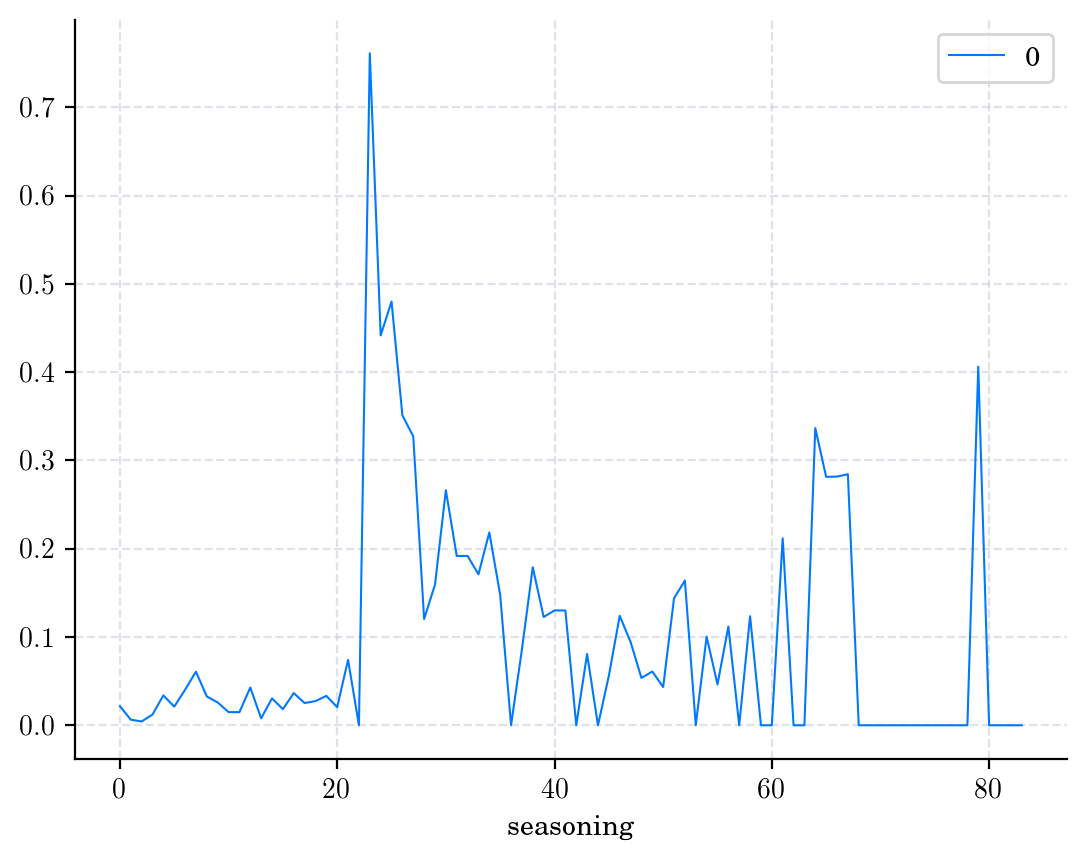

In [5]:
pd.DataFrame(CPR).plot()
plt.show()

In [6]:
CDR = portfolio.construct_portfolio_cdr()
CDR.head()

seasoning
0   0.00
1   0.00
2   0.02
3   0.01
4   0.02
dtype: float64

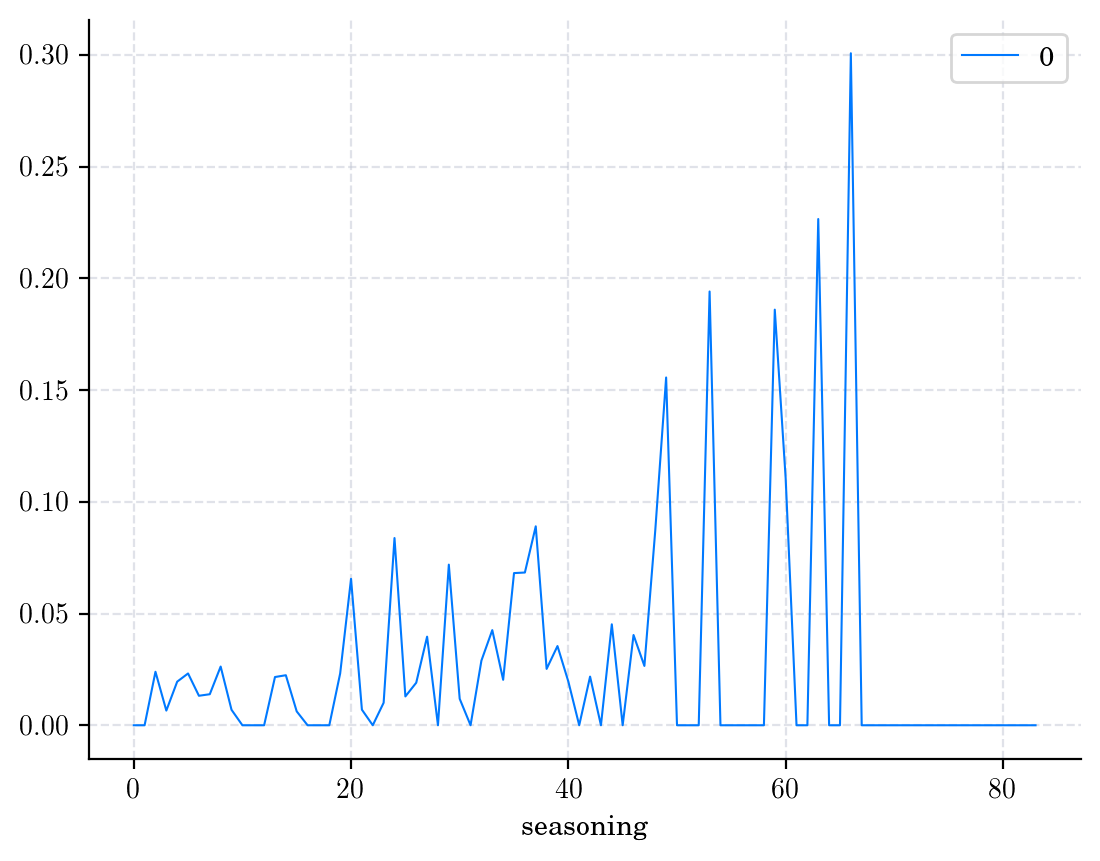

In [7]:
pd.DataFrame(CDR).plot(subplots=True)
plt.show()

In [8]:
CPR_by_product = portfolio.construct_portfolio_cpr(pivots=['seasoning', 'product'])
CPR_by_product.head()

product,1,2
seasoning,,
0,0.03,0.00
1,0.01,0.00
2,0.01,0.00
3,0.02,0.00
4,0.02,0.07


In [9]:
CPR_by_product = portfolio.construct_portfolio_cpr(pivots=['time_to_reversion', 'product'])
CPR_by_product.head(10)

product,1,2
time_to_reversion,,
-24,0.03,0.00
-23,0.01,0.00
-22,0.01,0.00
-21,0.02,0.00
-20,0.02,0.07
-19,0.02,0.04
-18,0.05,0.00
-17,0.08,0.00
-16,0.03,0.03


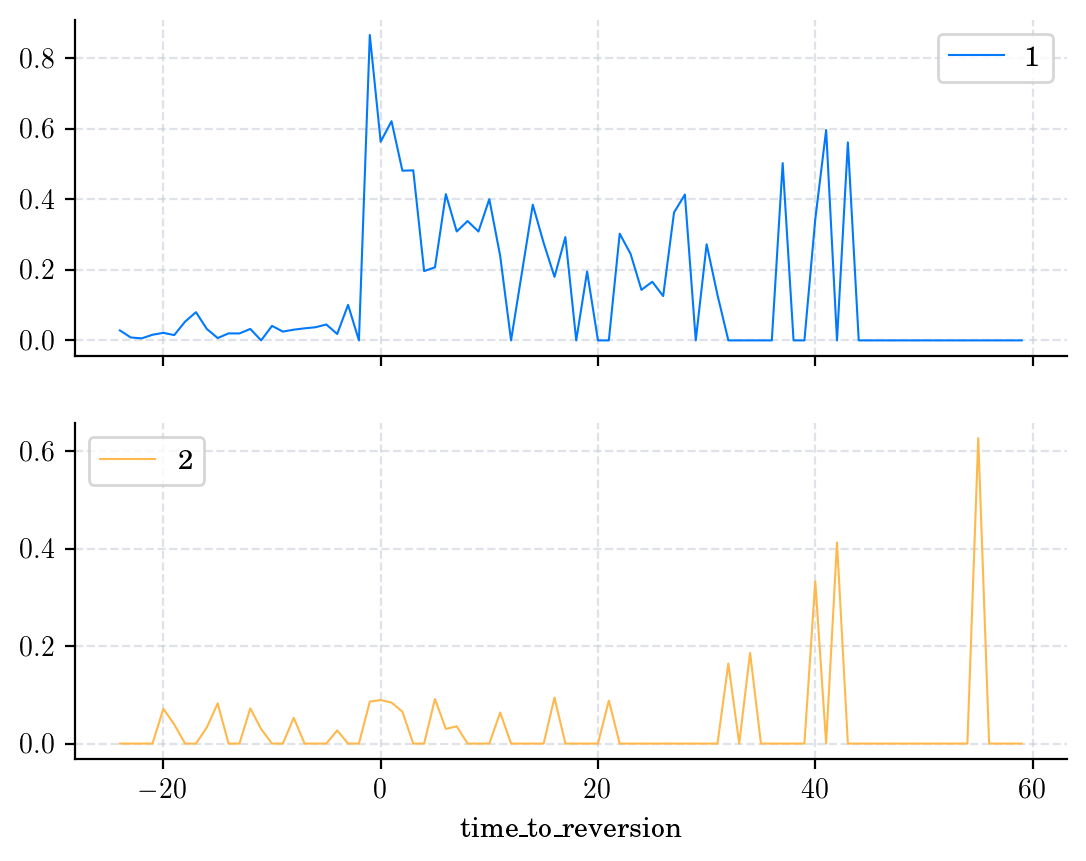

In [10]:
CPR_by_product.plot(subplots=True)
plt.show()